# Case study - 1

# Loan data from lending club

DATASET: https://www.openintro.org/data/index.php?data=loans_full_schema

Description:
Borrowers can make personal loans through the lending club platform. Based on the information provided by borrowers, investors can search for and select loans in which to invest. Each borrower receives a grade depending on how frequently they make and repay loans, which is only visible to investors. The interest rate charged to each borrower varies depending on their grade. When the investor is ready to invest, the loan is assigned to the borrower based on all of the information.

This dataframe consists of 10,000 observations with 55 variables where each variable describes information regarding borrower.These columns are described in the dictionary provided by openintro



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
init_notebook_mode(connected=True)

# To show the plots inline
%matplotlib inline

loan_df = pd.read_csv(r"loans_full_schema.csv",low_memory=False)
print(f"The Length of the data: {loan_df.shape}")
# show the last 10 rows of data 
loan_df.head(10)

The Length of the data: (10000, 55)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [2]:
loan_df.isna().sum()


emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Out of 55 variables-> annual_income_joint,verification_income_joint,debt_to_income_joint are variables alloted for joint borrowing.

However, as you can see, the majority of the values in these three variables are Null.
As a result, there is no way to predict interest rates for joint borrowing using this dataset.




In [3]:
# Get some statistics about the columns with numeric types
loan_df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [4]:
# Drop some fields that are not used for data analysis
cols_will_be_dropped = ['emp_title', 'annual_income_joint', 'verification_income_joint','state','earliest_credit_line','num_accounts_30d_past_due', 'debt_to_income_joint']

for col in cols_will_be_dropped:
    if col in loan_df.columns:
        loan_df.drop(col, axis=1, inplace=True)

In [5]:
loan_df.isna().sum()

emp_length                           817
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
months_since_last_delinq            5658
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_active_debit_accounts              0
total_debit_limit                      0
num_total_cc_acc

# Data Visualization 

The term of the loan specifies the number of payments required. Term values are in months and can range from 36 to 60.
The longer term (60 months) has a higher interest rate and total loan amount than the shorter term (36 months) (i.e., 36 months).

In [6]:
loan_df.groupby("term").agg({"loan_amount": np.mean, "interest_rate":np.mean}, axis = 1).reset_index()

,term,loan_amount,interest_rate
0,36,13810.401722,11.244927
1,60,22231.262376,15.147888


In [7]:
# Get the month list from the issue date of the loans and store it as a month column
datetime_list = pd.to_datetime(loan_df['issue_month'])
loan_df['month'] = datetime_list.dt.month


# Create categories for loan statuses as good, risky, and lost
lost = ["Charged Off", "Default"]

risky = ["In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]


loan_df['loan_condition'] = np.nan

def loan_condition(status):
    if status in lost:
        return 'Lost'
    elif status in risky:
        return 'Risky'
    else:
        return 'Good'
    
loan_df['loan_condition'] = loan_df['loan_status'].apply(loan_condition)

# Print the total number of good, lost, and risky loans.
print('The number of Good, Lost, and Risky Loans:')
loan_df["loan_condition"].value_counts()


The number of Good, Lost, and Risky Loans:


Good     9822
Risky     171
Lost        7
Name: loan_condition, dtype: int64

# Bar Plot on loan amount and month

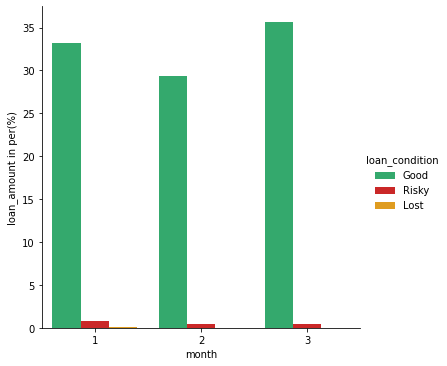

In [8]:
import seaborn as sns

colors = ["#21bc6c", "#e50d0d", "#FFA500"]
palette = ["#21bc6c", "#e50d0d", "#FFA500"]
labels ="Good", "Lost", "Risky"

g = sns.catplot(
    data=loan_df, kind="bar",
    x='month', y='loan_amount', hue='loan_condition',
    estimator=lambda x: len(x) / len(loan_df) * 100,palette=palette)

g.set_axis_labels("month", "loan_amount in per(%)")
g.legend.set_title("loan_condition")

plt.show()


# Findings

The bar chat above is between the loan issued months(january,february,march) and loan ammount in percentage%

1.During the month of January, we were able to locate all seven lost loans.

2.In February, investors reduced loan amounts, resulting in a decrease in risky loans and no lost loans.

3.Investors have increased the loan amount once more, but there has been no change in the risky loan, and the good news is that no new lost loans have been discovered in the month of March



# Box Plots on verified_income,interest rate and term

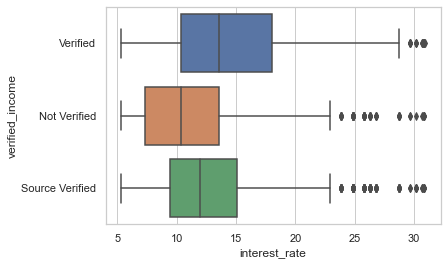

In [9]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="interest_rate", y="verified_income", data=loan_df)

# Findings

The box plot is between verified income and the interest rate.

1.There are many borrowers with interest rates ranging from 10.5 to 17.5 
whose income is verified,and only a few borrowers with interest rates 
ranging from 9 to 15 whose income source is verified.

2.When compared to Not verified and source verified, Verified borrowers has fewer outliers.






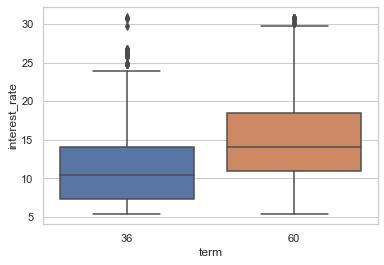

In [10]:
ax1 = sns.boxplot(y="interest_rate", x="term", data=loan_df)

# Findings

   The above box plot is between Term and the interest rate.

1.The number of borrowers distributed over the given terms (36 months and 60 months) is nearly equal.

2.We can find a high interest rate for borrowers with a 60-month term.

3.We can also find a lot of outliners for a 36-month term.

In [11]:
#to find correlation between all variable and interest rate 
loan_df[loan_df.columns[1:]].corr()['interest_rate'][:]

annual_income                      -0.099584
debt_to_income                      0.141653
delinq_2y                           0.090456
months_since_last_delinq           -0.082930
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
months_since_90d_late              -0.071466
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.100945
num_satisfactory_accounts          -0.013330
num_accounts_120d_past_due               NaN
num_active_debit_accounts           0.026800
total_debit_limit                  -0.254225
num_total_cc_accounts              -0.071238
num_open_c

In [12]:
df = loan_df.copy()
df['grade'] =df['grade'].astype('category').cat.codes
df['sub_grade'] =df['sub_grade'].astype('category').cat.codes
df['verified_income'] =df['verified_income'].astype('category').cat.codes
df['homeownership'] =df['homeownership'].astype('category').cat.codes
# df['Loan Status'] =df['Loan Status'].astype('category').cat.codes
df.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,inquiries_last_12m,total_credit_lines,open_credit_lines,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,month,loan_condition
0,3.0,0,90000.0,2,18.01,0,38.0,6,28,10,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,3,Good
1,10.0,2,40000.0,0,5.04,0,NaN,1,30,14,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,2,Good
2,3.0,2,40000.0,1,21.15,0,28.0,4,31,10,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,2,Good
3,1.0,2,30000.0,0,10.16,0,NaN,0,4,4,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,1,Good
4,10.0,2,35000.0,2,57.96,0,NaN,7,22,16,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,3,Good


In [13]:
df[df.columns[1:]].corr()['interest_rate'][:]

homeownership                       0.079634
annual_income                      -0.099584
verified_income                     0.242954
debt_to_income                      0.141653
delinq_2y                           0.090456
months_since_last_delinq           -0.082930
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
months_since_90d_late              -0.071466
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.100945
num_satisfactory_accounts          -0.013330
num_accounts_120d_past_due               NaN
num_active_debit_accounts           0.026800
total_debi

In [14]:
loan_df.dtypes

emp_length                          float64
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
delinq_2y                             int64
months_since_last_delinq            float64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts             int64
num_accounts_120d_past_due          float64
num_active_debit_accounts       

# Scatter Plot on interest rate and grade

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from scipy import stats

# df["grade"]= str(df["grade"])
# print(df["grade"].dtype)
loan_df = loan_df.sort_values(by="grade")
fig = px.scatter(loan_df, y="interest_rate", x="grade", color="grade",title = "")
fig.show()

# Findings

This scatter plot is between Interest rate and grade.

We can see from the plot above that as the borrower's grade rises, the interest rate rises automatically.

# Box plot on subgrade and loan amount

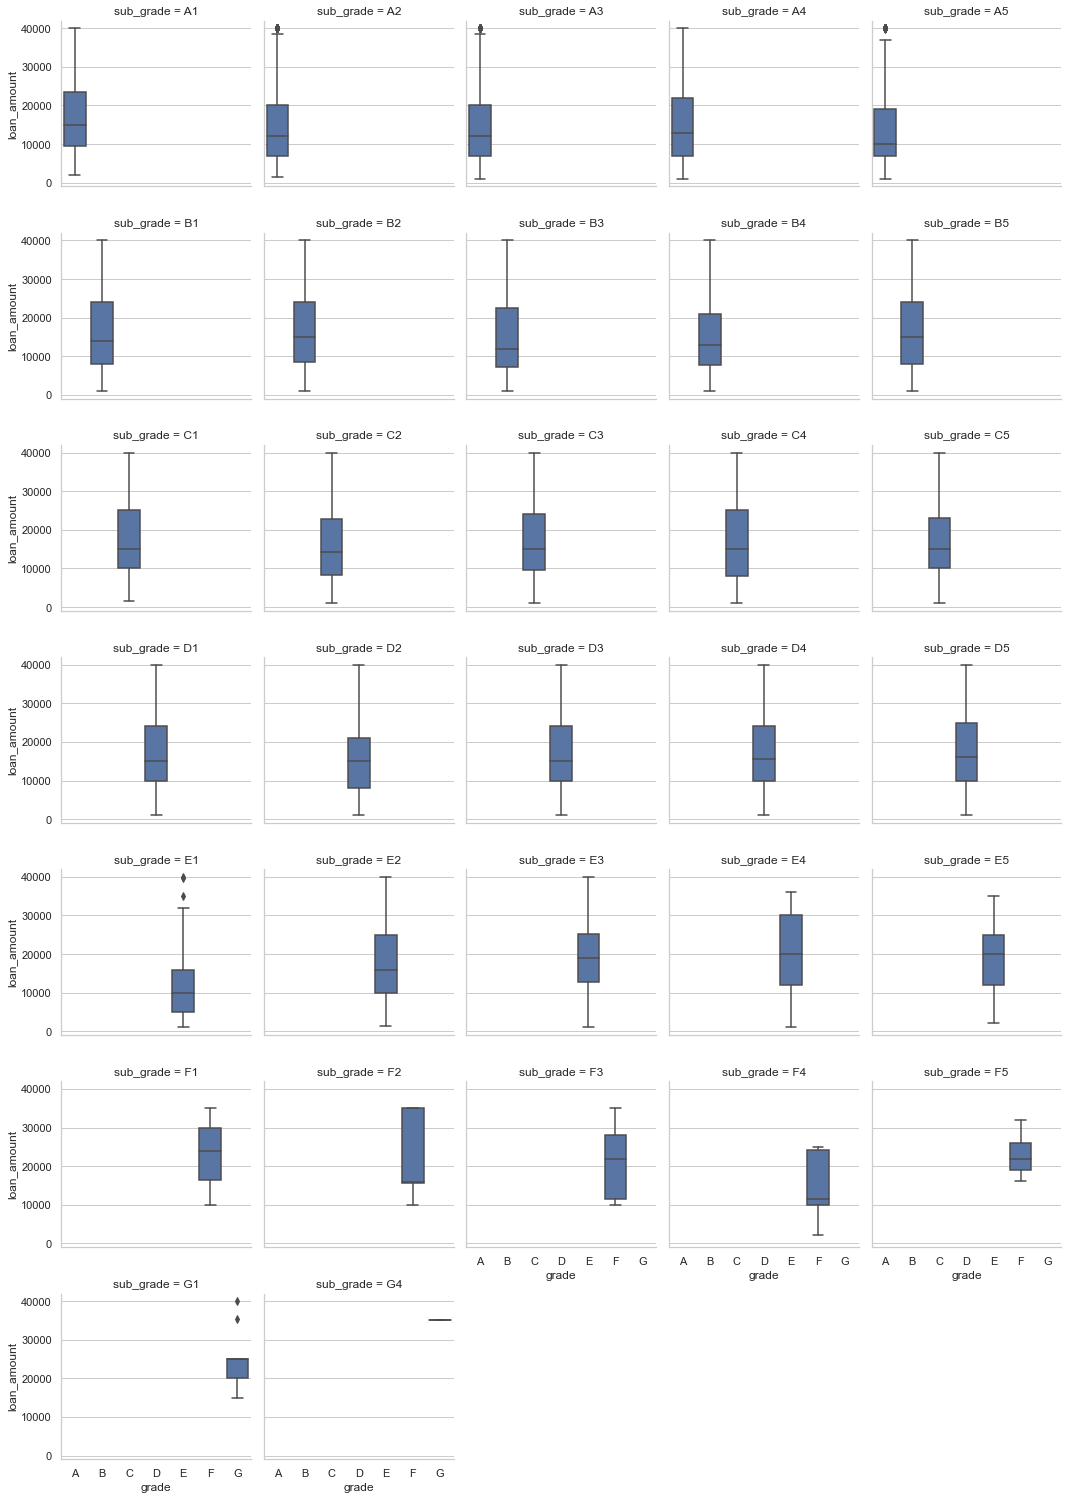

In [16]:

loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['sub_grade'] = loan_df['sub_grade'].astype('category')
#tmpDF['loan_amnt'] = tmpDF['loan_amnt'].astype('float')
#tmpDF['int_rate'] = tmpDF['int_rate'].astype('float')
#loanDF_Pandas['grade'] = loanDF_Pandas['grade'].astype('category')
#loanDF_Pandas['sub_grade'] = loanDF_Pandas['sub_grade'].astype('category')

#print(tmpDF)

g = sns.FacetGrid(loan_df, col="sub_grade", sharex=True, col_wrap=5)
#g = sns.FacetGrid(loanDF.toPandas(), col="sub_grade", sharex=False, col_wrap=5)
g.map(sns.boxplot, 'grade', 'loan_amount',order=None)

# g.savefig("FacetGrid_LoanAmt.pdf")
#fig.savefig("FacetGrid_LoanAmt.pdf")

# Findings

1.From the above box plot, we can find that for every grade/subgrade the loan amount nearly ranges from 10k to 25k for maximum of brrowers.

2.For E4 and F2 sub grade, the loan ammount equals/crossed 30k

# Line plot between loan amount and interest rate

<AxesSubplot:xlabel='interest_rate', ylabel='loan_amount'>

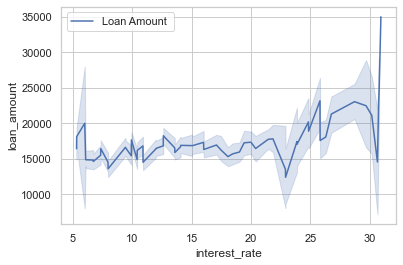

In [17]:
#loanDF = loan_df["loan_amount"]
#loanDF = loan_df["interest_rate"]

sns.lineplot(y=loan_df["loan_amount"], x=loan_df["interest_rate"], data=loan_df, label="Loan Amount ")


# Findings

Even in the above line plot, 

The loan amount is nearly the same for all interest rates, but when the interest rate is 30 or higher, the loan amount increased dramatically.

# Bar plot between grade, subgrade and loan status.

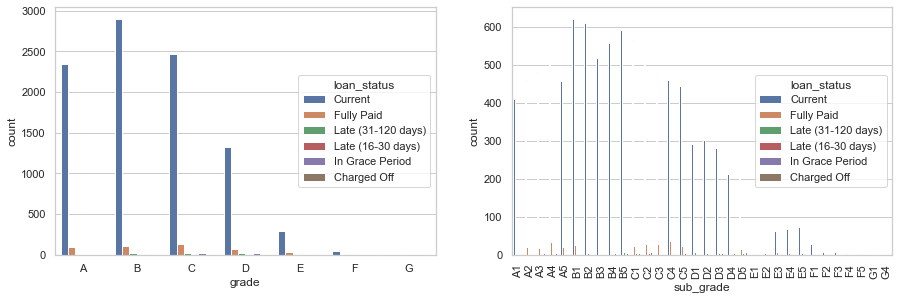

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(loan_df.grade.unique().tolist())
sns.countplot(x='grade', data=loan_df, hue='loan_status', order=grade)
plt.legend(loc='center right', title='loan_status')

plt.subplot(2, 2, 2)
sub_grade = sorted(loan_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=loan_df, hue='loan_status', order=sub_grade)
plt.legend(loc='center right', title='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

# Findings

From the above subplots,

1.We discovered that the majority of current-loan-status borrowers are from grade B.

2.As the grade progressed from B to G, the number of borrowers with current loan status decreased. 

# Data preprocessing

In [19]:
# The length of the data
print(f"The Length of the data: {loan_df.shape}")

The Length of the data: (10000, 50)


In [20]:
# Missing values
for column in loan_df.columns:
    if loan_df[column].isna().sum() != 0:
        missing = loan_df[column].isna().sum()
        portion = (missing / loan_df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '817' ==> '8.170%'
'debt_to_income': number of missing values '24' ==> '0.240%'
'months_since_last_delinq': number of missing values '5658' ==> '56.580%'
'months_since_90d_late': number of missing values '7715' ==> '77.150%'
'months_since_last_credit_inquiry': number of missing values '1271' ==> '12.710%'
'num_accounts_120d_past_due': number of missing values '318' ==> '3.180%'


In [21]:
loan_df.drop(['months_since_last_delinq','months_since_90d_late'], axis=1, inplace=True)


In [22]:
loan_df.emp_length.unique()

array([10.,  1., nan,  4.,  3.,  6.,  9.,  0.,  5.,  2.,  7.,  8.])

In [23]:
loan_df.emp_length.nunique()

11

In [24]:
for year in loan_df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{loan_df[loan_df.emp_length == year].interest_rate.value_counts(normalize=True)}")
    print('==========================================')

10.0 years in this position:
9.44     0.042617
9.93     0.042017
11.99    0.037215
6.72     0.037215
10.42    0.036014
7.35     0.034514
12.62    0.033914
9.43     0.033313
6.08     0.032713
13.59    0.031212
10.91    0.030012
16.02    0.028211
7.34     0.027911
14.08    0.025510
5.32     0.025510
15.05    0.025210
10.90    0.025210
9.92     0.024910
12.61    0.024610
7.97     0.023109
11.98    0.022809
13.58    0.022509
17.09    0.021008
7.96     0.021008
5.31     0.021008
15.04    0.020408
6.07     0.020108
10.41    0.018908
19.03    0.018908
16.01    0.018607
18.06    0.017407
14.07    0.016807
21.45    0.016206
6.71     0.015606
20.00    0.014406
19.42    0.012905
17.47    0.010804
18.45    0.010504
20.39    0.009604
21.85    0.008403
23.88    0.004502
24.85    0.004502
26.30    0.004202
25.82    0.003902
25.81    0.003601
26.77    0.003601
28.72    0.003301
24.84    0.002701
22.91    0.002701
23.87    0.002401
30.79    0.001200
22.90    0.001200
29.69    0.001200
30.65    0.000600

In [25]:
loan_df.drop('emp_length', axis=1, inplace=True)

In [26]:
loan_df.debt_to_income.value_counts().head()

0.00     28
16.11    14
19.42    12
13.20    12
20.66    12
Name: debt_to_income, dtype: int64

In [27]:
loan_df.debt_to_income.isna().sum()

24

In [28]:
# Missing values
for column in loan_df.columns:
    if loan_df[column].isna().sum() != 0:
        missing = loan_df[column].isna().sum()
        portion = (missing / loan_df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'debt_to_income': number of missing values '24' ==> '0.240%'
'months_since_last_credit_inquiry': number of missing values '1271' ==> '12.710%'
'num_accounts_120d_past_due': number of missing values '318' ==> '3.180%'


In [29]:
loan_df.drop('months_since_last_credit_inquiry', axis=1, inplace=True)
             

In [30]:
loan_df.dropna(inplace=True)

In [31]:
loan_df.dtypes

homeownership                     object
annual_income                    float64
verified_income                   object
debt_to_income                   float64
delinq_2y                          int64
inquiries_last_12m                 int64
total_credit_lines                 int64
open_credit_lines                  int64
total_credit_limit                 int64
total_credit_utilized              int64
num_collections_last_12m           int64
num_historical_failed_to_pay       int64
current_accounts_delinq            int64
total_collection_amount_ever       int64
current_installment_accounts       int64
accounts_opened_24m                int64
num_satisfactory_accounts          int64
num_accounts_120d_past_due       float64
num_active_debit_accounts          int64
total_debit_limit                  int64
num_total_cc_accounts              int64
num_open_cc_accounts               int64
num_cc_carrying_balance            int64
num_mort_accounts                  int64
account_never_de

In [32]:
duplicate = loan_df[loan_df.duplicated()]
duplicate

,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,month,loan_condition


In [33]:
loan_df.dtypes

homeownership                     object
annual_income                    float64
verified_income                   object
debt_to_income                   float64
delinq_2y                          int64
inquiries_last_12m                 int64
total_credit_lines                 int64
open_credit_lines                  int64
total_credit_limit                 int64
total_credit_utilized              int64
num_collections_last_12m           int64
num_historical_failed_to_pay       int64
current_accounts_delinq            int64
total_collection_amount_ever       int64
current_installment_accounts       int64
accounts_opened_24m                int64
num_satisfactory_accounts          int64
num_accounts_120d_past_due       float64
num_active_debit_accounts          int64
total_debit_limit                  int64
num_total_cc_accounts              int64
num_open_cc_accounts               int64
num_cc_carrying_balance            int64
num_mort_accounts                  int64
account_never_de

# Categorical and dummy variables

In [34]:
loan_df.homeownership.unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [35]:
loan_df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Charged Off'], dtype=object)

In [36]:
loan_df.issue_month.unique()

array(['Jan-2018', 'Mar-2018', 'Feb-2018'], dtype=object)

Replacing jan,feb,mar months as 1,2,3 respectively

In [37]:
issue_month_values={'Jan-2018': 1 ,'Feb-2018': 2, 'Mar-2018': 3}
loan_df['issue_month']= loan_df.issue_month.map(issue_month_values)

In [38]:
loan_df.issue_month.unique()

array([1, 3, 2], dtype=int64)

In [39]:
loan_df.loan_condition.unique()

array(['Good', 'Risky', 'Lost'], dtype=object)

In [40]:
loan_df.disbursement_method.unique()

array(['Cash', 'DirectPay'], dtype=object)

In [41]:
loan_df.drop('disbursement_method', axis=1, inplace=True)

In [42]:
dummies = ['verified_income', 'loan_purpose', 'initial_listing_status', 
           'application_type', 'homeownership']
loan_df = pd.get_dummies(loan_df, columns=dummies, drop_first=True)

In [43]:
loan_df.drop('loan_status', axis=1, inplace=True)

In [44]:
loan_df.loan_condition.unique()

array(['Good', 'Risky', 'Lost'], dtype=object)

Replacing good = 100, Risky=50, Lost=10

In [45]:
loan_condition_values={'Good': 100 ,'Risky': 50, 'Lost': 10}
loan_df['loan_condition']= loan_df.loan_condition.map(loan_condition_values)

In [46]:
loan_df.loan_condition.unique()

array([100,  50,  10], dtype=int64)

In [47]:
loan_df.shape
loan_df.dtypes

annual_income                       float64
debt_to_income                      float64
delinq_2y                             int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
num_satisfactory_accounts             int64
num_accounts_120d_past_due          float64
num_active_debit_accounts             int64
total_debit_limit                     int64
num_total_cc_accounts                 int64
num_open_cc_accounts                  int64
num_cc_carrying_balance               int64
num_mort_accounts                     int64
account_never_delinq_percent    

In [48]:
loan_df['grade'] =loan_df['grade'].astype('category').cat.codes
loan_df['sub_grade'] =loan_df['sub_grade'].astype('category').cat.codes

In [49]:
mid = loan_df['interest_rate']
loan_df.drop(labels=['interest_rate'], axis=1,inplace = True)


In [50]:
loan_df["interest_rate"]= mid

In [51]:
data_x= loan_df.iloc[:,:54].values
data_y= loan_df["interest_rate"].values
loan_df.dtypes

annual_income                      float64
debt_to_income                     float64
delinq_2y                            int64
inquiries_last_12m                   int64
total_credit_lines                   int64
open_credit_lines                    int64
total_credit_limit                   int64
total_credit_utilized                int64
num_collections_last_12m             int64
num_historical_failed_to_pay         int64
current_accounts_delinq              int64
total_collection_amount_ever         int64
current_installment_accounts         int64
accounts_opened_24m                  int64
num_satisfactory_accounts            int64
num_accounts_120d_past_due         float64
num_active_debit_accounts            int64
total_debit_limit                    int64
num_total_cc_accounts                int64
num_open_cc_accounts                 int64
num_cc_carrying_balance              int64
num_mort_accounts                    int64
account_never_delinq_percent       float64
tax_liens  

In [52]:
loan_df.dtypes

annual_income                      float64
debt_to_income                     float64
delinq_2y                            int64
inquiries_last_12m                   int64
total_credit_lines                   int64
open_credit_lines                    int64
total_credit_limit                   int64
total_credit_utilized                int64
num_collections_last_12m             int64
num_historical_failed_to_pay         int64
current_accounts_delinq              int64
total_collection_amount_ever         int64
current_installment_accounts         int64
accounts_opened_24m                  int64
num_satisfactory_accounts            int64
num_accounts_120d_past_due         float64
num_active_debit_accounts            int64
total_debit_limit                    int64
num_total_cc_accounts                int64
num_open_cc_accounts                 int64
num_cc_carrying_balance              int64
num_mort_accounts                    int64
account_never_delinq_percent       float64
tax_liens  

# Train and Test split

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, train_size=0.8, test_size=0.2, random_state=25)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")



No. of training examples: 7726
No. of testing examples: 1932


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9876928386796946
0.9891457466456928


In [55]:
model = LinearRegression()
model.fit(data_x,data_y)
y_fx_predict = model.predict(data_x)
print(model.score(data_x, data_y))

0.9879996467371306


In [56]:
data_new= loan_df.copy()
data_new.values
pr=model.predict(data_new.iloc[:,:54]) 
res=pd.DataFrame(data=loan_df['interest_rate'],columns=['interest_rate'])
res['interest_rate_new']=pr
res.to_csv("pred.csv", index=False)

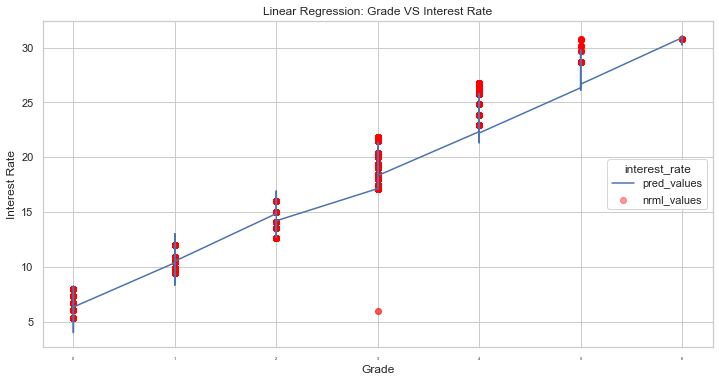

In [57]:
month_year = loan_df['grade']
month_year = month_year.astype(str)
plt.figure(figsize=(12,6))
plt.scatter(month_year, data_y, alpha=0.4,color="red",label="nrml_values")
plt.plot(month_year, y_fx_predict,label="pred_values")
plt.title("Linear Regression: Grade VS Interest Rate")
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.xticks(fontsize=4)
plt.legend(loc='center right', title='interest_rate')
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor


# Fit regression model
# regr = DecisionTreeRegressor(max_depth=2)
# regr.fit(x_train, y_train)

# result = regr.predict(x_test)
# print(result)

In [59]:
models=[]
#models.append(("Logistic Regression",LogisticRegression()))
'''models.append(("Gaussian Naive Bayes",GaussianNB()))
models.append(("Stochastic Gradient Descent",SGDClassifier()))
models.append(("K-nearest Neighbors",KNeighborsClassifier()))
models.append(("Decision Trees", DecisionTreeClassifier()))
models.append(("Random Forest Regression",RandomForestClassifier()))'''
models.append(("Support Vector Classifier",SVC()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

# Decision Tree Regression 

In [60]:

regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)

result = regr.predict(x_test)
y_dx_predict = regr.predict(data_x)
print(regr.score(x_test, y_test))

0.9782874598224425


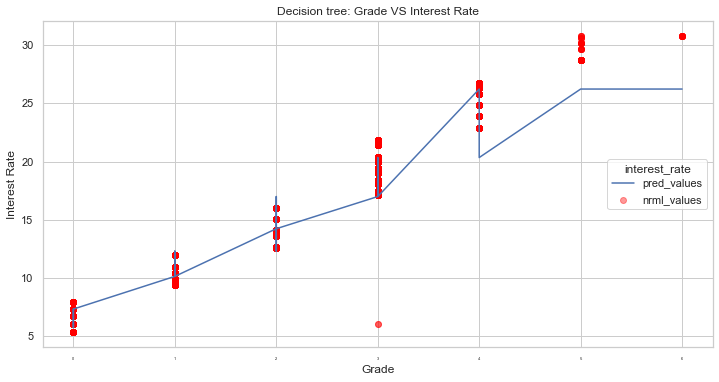

In [61]:
month_year = loan_df['grade']
month_year = month_year.astype(str)
plt.figure(figsize=(12,6))
plt.scatter(month_year, data_y, alpha=0.4,color="red",label="nrml_values")
plt.plot(month_year,y_dx_predict,label="pred_values")
plt.title("Decision tree: Grade VS Interest Rate")
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.xticks(fontsize=4)
plt.legend(loc='center right', title='interest_rate')
plt.show()